<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/Unit_4/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree (Classification)


## 1. Import libraries and dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_class = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv')

In [3]:
df_class.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## 2. Missing values and EDA

Skip. It has been done within `Logistic_regression_predict_ad_click.ipynb`.

## 3. Data wrangling

remove all non-numeric variable.

In [4]:
df_class.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1,inplace=True)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_class.drop('Clicked on Ad', axis=1)) # standardize the dataset without the label. DO NOT standardize label
scaled_features = scaler.transform(df_class.drop('Clicked on Ad',axis=1)) # column names were removed after standardize
scaled_features
df_feat = pd.DataFrame(scaled_features, columns=df_class.columns[:-1]) # add back column names
df_feat.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


## 4. Buid decision trees

In [6]:
# split data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_feat, df_class['Clicked on Ad'], test_size=0.30, random_state=101)
# build decision trees
from sklearn.tree import DecisionTreeClassifier # import library
classifier = DecisionTreeClassifier() # set up model
classifier.fit(x_train, y_train) # model fitting
y_pred = classifier.predict(x_test) # make predictions

## 5. Evaluate model

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[150   7]
 [  7 136]]


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       157
           1       0.95      0.95      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



Compare to the scores we get with logistic regression, we do not have higher scores when using a decision tree model. Therefore, a logistic model is a better choice for an advertising dataset

## 6. Visualizing the tree

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


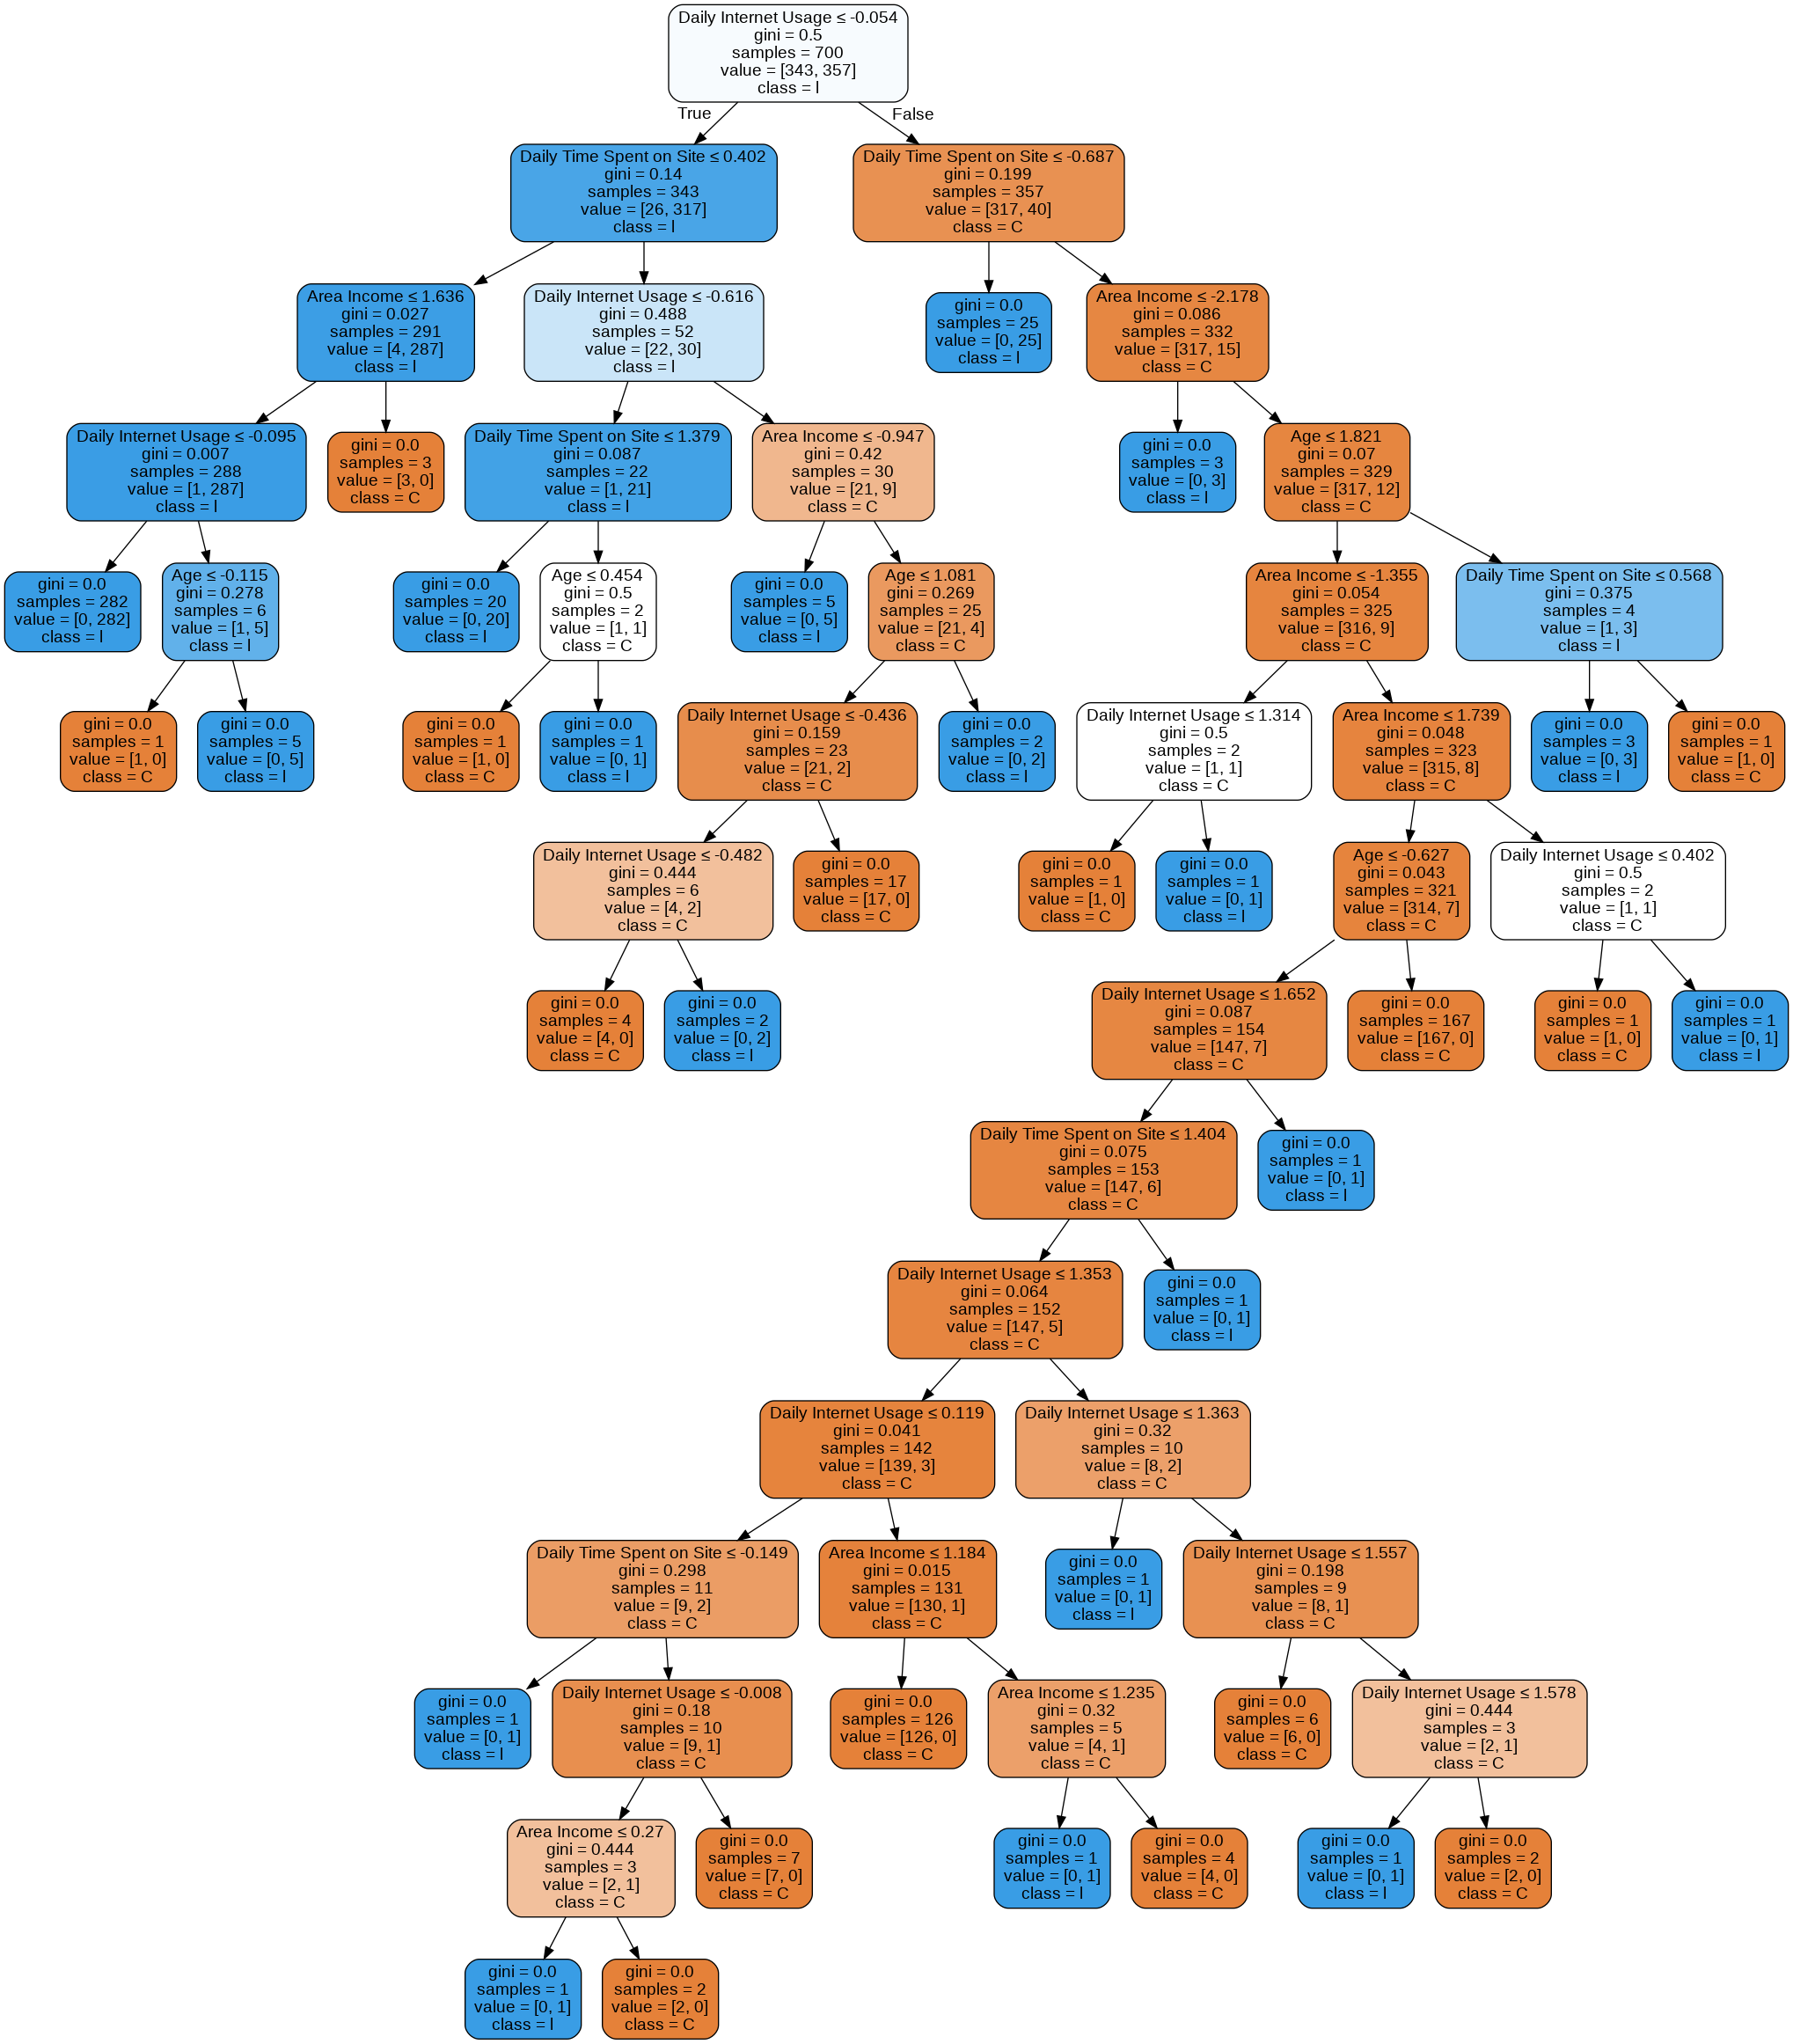

In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df_feat.columns,class_names='Clicked on Ad')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())